# Ajuste dos Dados

Div = League Division

Date = Match Date (dd/mm/yy)

Time = Time of match kick off

HomeTeam = Home Team

AwayTeam = Away Team

FTHG and HG = Full Time Home Team Goals

FTAG and AG = Full Time Away Team Goals

FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)

HS = Home Team Shots

AS = Away Team Shots


In [187]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

#Ler todos os arquivos e juntar em apenas um csv


#dir_path = 'drive/MyDrive/TCC/Dataset'

#folders = [f for f in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path, f))]

#all_files = []

#for folder in folders:
#    folder_path = os.path.join(dir_path, folder)
#    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
#    csv_files = [os.path.join(folder_path, f) for f in csv_files]
#    all_files.extend(csv_files)

#df = pd.concat((pd.read_csv(f, encoding='latin1') for f in all_files), ignore_index=True)

#df.to_csv('drive/MyDrive/TCC/Dataset/all.csv', index=False)


In [188]:
data = pd.read_csv('drive/MyDrive/TCC/Dataset/all.csv', low_memory=False)

# Separar as colunas que serão utilizadas no modelo
cols = ["Div", "Date","HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS", "B365H", "B365D", "B365A", "B365AHH", "B365AHA" ]
data = data[cols]

#separando em um novo dataset, garantindo ter apenas informações da Premier League
data = data.loc[data['Div'] == 'E0']

In [189]:
data.tail()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,B365AHH,B365AHA
4555,E0,28/05/2023,Everton,Bournemouth,1.0,0.0,H,13.0,7.0,1.50,4.50,6.50,2.09,1.81
4556,E0,28/05/2023,Leeds,Tottenham,1.0,4.0,A,19.0,11.0,2.75,3.80,2.30,1.82,2.08
4557,E0,28/05/2023,Leicester,West Ham,2.0,1.0,H,13.0,16.0,1.91,3.80,3.60,1.95,1.95
4558,E0,28/05/2023,Man United,Fulham,2.0,1.0,H,21.0,10.0,1.50,4.33,6.00,1.87,2.03
4559,E0,28/05/2023,Southampton,Liverpool,4.0,4.0,D,15.0,30.0,6.50,4.75,1.44,1.75,2.05


In [190]:
# Substituir valores vazios por 1 nas colunas selecionadas
columns_to_fill = ['B365H', 'B365D', 'B365A', 'B365AHH', 'B365AHA']
data[columns_to_fill] = data[columns_to_fill].fillna(1)

In [191]:
# verificar se nas colunas "HomeTeam" e "AwayTeam" tem nomes diferentes entre equipes
cols = ["HomeTeam", "AwayTeam"]
data_selecionado = data[cols]

nomes_home = data_selecionado["HomeTeam"].unique()
nomes_away = data_selecionado["AwayTeam"].unique()

# Exiba os nomes distintos em "HomeTeam"
print("Nomes distintos em HomeTeam:")
print(nomes_home)

# Exiba os nomes distintos em "AwayTeam"
print("Nomes distintos em AwayTeam:")
print(nomes_away)

Nomes distintos em HomeTeam:
['Arsenal' 'Brighton' 'Chelsea' 'Crystal Palace' 'Everton' 'Southampton'
 'Watford' 'West Brom' 'Man United' 'Newcastle' 'Bournemouth' 'Burnley'
 'Leicester' 'Liverpool' 'Stoke' 'Swansea' 'Huddersfield' 'Tottenham'
 'Man City' 'West Ham' 'Aston Villa' 'Norwich' 'Sheffield United' 'Wolves'
 'Hull' 'Middlesbrough' 'Sunderland' 'Fulham' 'Cardiff' 'QPR' 'Reading'
 'Wigan' 'Blackburn' 'Bolton' 'Leeds' 'Brentford' "Nott'm Forest"]
Nomes distintos em AwayTeam:
['Leicester' 'Man City' 'Burnley' 'Huddersfield' 'Stoke' 'Swansea'
 'Liverpool' 'Bournemouth' 'West Ham' 'Tottenham' 'Watford' 'West Brom'
 'Brighton' 'Crystal Palace' 'Arsenal' 'Man United' 'Newcastle' 'Chelsea'
 'Everton' 'Southampton' 'Norwich' 'Sheffield United' 'Aston Villa'
 'Wolves' 'Sunderland' 'Hull' 'Middlesbrough' 'Cardiff' 'Fulham' 'QPR'
 'Reading' 'Wigan' 'Bolton' 'Blackburn' 'Leeds' 'Brentford'
 "Nott'm Forest"]


In [192]:
data.dropna(subset=["Div", "Date","HomeTeam", "AwayTeam", "FTHG", "FTAG", "FTR", "HS", "AS", "B365H", "B365D", "B365A", "B365AHH", "B365AHA" ], inplace=True)

In [193]:
#Deixar as datas no mesmo formato : dayfirst(dia primeiro)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

In [194]:
#ordenar por data
data = data.sort_values(by='Date', ascending=True)

In [195]:
data = pd.DataFrame(data)
data = data.reset_index()
data = data.rename(columns = {"index": "Game_id"})
data["Game_id"] = data.index + 1

In [196]:
# Mapear valores HTR para H=0, D=1, A=2
htr_map = {'H': 0, 'D': 1, 'A': 2}
data['FTR'] = data['FTR'].map(htr_map)

data["FTR"] = data["FTR"].astype(int)

In [197]:
from sklearn.preprocessing import LabelEncoder

# Aplicar o LabelEncoder para transformar os nomes dos clubes em números inteiros
le = LabelEncoder()
data['HomeTeam_id'] = le.fit_transform(data['HomeTeam'])
data['AwayTeam_id'] = le.fit_transform(data['AwayTeam'])

In [198]:
data.tail()

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,B365AHH,B365AHA,HomeTeam_id,AwayTeam_id
4555,4556,E0,2023-05-28,Brentford,Man City,1.0,0.0,0,11.0,17.0,3.80,4.00,1.83,2.05,1.85,5,18
4556,4557,E0,2023-05-28,Aston Villa,Brighton,2.0,1.0,0,12.0,8.0,2.00,3.60,3.50,2.04,1.86,1,6
4557,4558,E0,2023-05-28,Arsenal,Wolves,5.0,0.0,0,14.0,6.0,1.36,5.25,8.00,2.01,1.89,0,36
4558,4559,E0,2023-05-28,Chelsea,Newcastle,1.0,1.0,1,22.0,13.0,2.90,3.50,2.38,1.83,2.07,9,21
4559,4560,E0,2023-05-28,Southampton,Liverpool,4.0,4.0,1,15.0,30.0,6.50,4.75,1.44,1.75,2.05,27,17


In [199]:
# Adicionando a coluna temporada com as temporadas
import datetime

data["Season"] = 0
data["Season"] = data["Season"].astype(int)

# Percorre as linhas do DataFrame e adiciona a temporada correspondente
for index, row in data.iterrows():
    date = row["Date"]
    year = date.year
    if date >= datetime.datetime(year, 8, 1):
        season = year
    else:
        season = year - 1
    data.at[index, "Season"] = season

data.tail()

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,B365AHH,B365AHA,HomeTeam_id,AwayTeam_id,Season
4555,4556,E0,2023-05-28,Brentford,Man City,1.0,0.0,0,11.0,17.0,3.80,4.00,1.83,2.05,1.85,5,18,2022
4556,4557,E0,2023-05-28,Aston Villa,Brighton,2.0,1.0,0,12.0,8.0,2.00,3.60,3.50,2.04,1.86,1,6,2022
4557,4558,E0,2023-05-28,Arsenal,Wolves,5.0,0.0,0,14.0,6.0,1.36,5.25,8.00,2.01,1.89,0,36,2022
4558,4559,E0,2023-05-28,Chelsea,Newcastle,1.0,1.0,1,22.0,13.0,2.90,3.50,2.38,1.83,2.07,9,21,2022
4559,4560,E0,2023-05-28,Southampton,Liverpool,4.0,4.0,1,15.0,30.0,6.50,4.75,1.44,1.75,2.05,27,17,2022


In [200]:
#Clubes que subiram separados por temporada
data["HomePromoted"] = 0

data["AwayPromoted"] = 0

# cria um dicionário com os dados dos clubes que subiram em cada temporada
dataPrometed = {
    '2011': ['QPR', 'Norwich', 'Swansea'],
    '2012': ['Reading', 'Southampton', 'West Ham'],
    '2013': ['Cardiff', 'Hull', 'Crystal Palace'],
    '2014': ['Leicester', 'Burnley', 'QPR'],
    '2015': ['Watford', 'Bournemouth', 'Norwich'],
    '2016': ['Burnley', 'Hull', 'Middlesbrough'],
    '2017': ['Newcastle', 'Brighton', 'Huddersfield'],
    '2018': ['Wolves', 'Cardiff', 'Fulham'],
    '2019': ['Norwich', 'Sheffield United', 'Aston Villa'],
    '2020': ['Leeds', 'West Brom', 'Fulham'],
    '2021': ['Norwich', 'Watford', 'Brentford'],
    '2022': ['Fulham', 'Bournemouth', "Nott'm Forest"]
}

# Para cada jogo, verificar se o time da casa ou o visitante está no dicionário de clubes promovidos
for i, row in data.iterrows():
    if row['HomeTeam'] in dataPrometed.get(str(row['Season']), []):
        data.at[i, 'HomePromoted'] = 1
    if row['AwayTeam'] in dataPrometed.get(str(row['Season']), []):
        data.at[i, 'AwayPromoted'] = 1

data.head()

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,B365AHH,B365AHA,HomeTeam_id,AwayTeam_id,Season,HomePromoted,AwayPromoted
0,1,E0,2011-08-13,Liverpool,Sunderland,1.0,1.0,1,11.0,15.0,1.57,3.60,7.0,1.0,1.0,17,29,2011,0,0
1,2,E0,2011-08-13,Blackburn,Wolves,1.0,2.0,2,16.0,13.0,2.20,3.20,3.5,1.0,1.0,2,36,2011,0,0
2,3,E0,2011-08-13,Fulham,Aston Villa,0.0,0.0,1,13.0,7.0,2.20,3.20,3.5,1.0,1.0,12,1,2011,0,0
3,4,E0,2011-08-13,Newcastle,Arsenal,0.0,0.0,1,6.0,9.0,3.75,3.25,2.1,1.0,1.0,21,0,2011,0,0
4,5,E0,2011-08-13,QPR,Bolton,0.0,4.0,2,13.0,13.0,2.40,3.25,3.0,1.0,1.0,24,3,2011,1,0


In [201]:
temporadas = data['Season'].value_counts().index.sort_values().values

for temporada in temporadas:
    equipes_temporada = {}

    for id in data["HomeTeam_id"].unique():
        equipes_temporada[id] = {"vitorias": 0, "derrotas": 0, "empates": 0, "last_vitorias": 0, 
                                 "last_derrotas": 0, "last_empates": 0, "gols": 0, "last_gols": 0,
                                 "gols_levados": 0, "last_gols_levados": 0, "chutes_gol":0, "last_chutes_gol": 0,
                                 "quant_partidas": 0, "last_quant_part": 0, "round": 0}
    round = 1;
    count = 0; 

    dft = data[data['Season'] == temporada]

    for index, row in dft.iterrows():

        if count == 10:
          count = 0
          round +=1

        count += 1;

        home_team_id = row["HomeTeam_id"]
        away_team_id = row["AwayTeam_id"]

        home_team = equipes_temporada[home_team_id]
        away_team = equipes_temporada[away_team_id]

        home_team["vitorias"] = home_team["last_vitorias"]
        away_team["derrotas"] = away_team["last_derrotas"]
        home_team["derrotas"] = home_team["last_derrotas"]
        away_team["vitorias"] = away_team["last_vitorias"]
        home_team["empates"] = home_team["last_empates"]
        away_team["empates"] = away_team["last_empates"]

        # Atualiza o número de vitórias, derrotas e empates para a equipe da casa
        if row["FTR"] == 0:
            home_team["last_vitorias"] += 1
            away_team["last_derrotas"] += 1
        elif row["FTR"] == 2:
            home_team["last_derrotas"] += 1
            away_team["last_vitorias"] += 1
        else:
            home_team["last_empates"] += 1
            away_team["last_empates"] += 1
          
        home_team["gols"] = home_team["last_gols"]
        away_team["gols"] = away_team["last_gols"]
        home_team["last_gols"] += row["FTHG"]
        away_team["last_gols"] += row["FTAG"]

        home_team["gols_levados"] = home_team["last_gols_levados"]
        away_team["gols_levados"] = away_team["last_gols_levados"]
        home_team["last_gols_levados"] += row["FTAG"]
        away_team["last_gols_levados"] += row["FTHG"]

        home_team["chutes_gol"] = home_team["last_chutes_gol"]
        away_team["chutes_gol"] = away_team["last_chutes_gol"]
        home_team["last_chutes_gol"] += row["HS"]
        away_team["last_chutes_gol"] += row["AS"]

        home_team["quant_partidas"] = home_team["last_quant_part"]
        away_team["quant_partidas"] = away_team["last_quant_part"]
        home_team["last_quant_part"] += 1
        away_team["last_quant_part"] += 1

        # Adiciona as informações atualizadas ao dicionário de equipes da temporada
        equipes_temporada[home_team_id] = home_team
        equipes_temporada[away_team_id] = away_team

        # Atualiza o dataframe com as informações de vitórias, derrotas e empates da rodada
        data.at[index, 'Wins_Home_Team'] = home_team["vitorias"]
        data.at[index, 'Wins_Away_Team'] = away_team["vitorias"]

        data.at[index, 'Loss_Home_Team'] = home_team["derrotas"]
        data.at[index, 'Loss_Away_Team'] = away_team["derrotas"]

        data.at[index, 'Draw_Home_Team'] = home_team["empates"]
        data.at[index, 'Draw_Away_Team'] = away_team["empates"]

        data.at[index, 'Goals_Home_Team'] = home_team["gols"]
        data.at[index, 'Goals_Away_Team'] = away_team["gols"]

        data.at[index, 'Conceded_Goals_Home_Team'] = home_team["gols_levados"]
        data.at[index, 'Conceded_Goals_Away_Team'] = away_team["gols_levados"]

        data.at[index, 'Shots_Home_Team'] = home_team["chutes_gol"]
        data.at[index, 'Shots_Away_Team'] = away_team["chutes_gol"]

        data.at[index, 'Matches_Home_Team'] = home_team["quant_partidas"]
        data.at[index, 'Matches_Away_Team'] = away_team["quant_partidas"]

        data.at[index, 'Round'] =  str(temporada) + "/" + str('{:02d}'.format(round));

In [202]:
# Média de gols da euipe na temporada
data = data.assign(avg_goals_home_team = data['Goals_Home_Team'] / data['Matches_Home_Team'],
                   avg_goals_away_team = data['Goals_Away_Team'] / data['Matches_Away_Team'],
                   avg_conceded_home_team = data['Conceded_Goals_Home_Team'] / data['Matches_Home_Team'],
                   avg_conceded_away_team = data['Conceded_Goals_Away_Team'] / data['Matches_Away_Team'])

In [203]:
data.loc[:, 'avg_goals_home_team'] = data['avg_goals_home_team'].fillna(0)
data.loc[:, 'avg_goals_away_team'] = data['avg_goals_away_team'].fillna(0)
data.loc[:, 'avg_conceded_home_team'] = data['avg_conceded_home_team'].fillna(0)
data.loc[:, 'avg_conceded_away_team'] = data['avg_conceded_away_team'].fillna(0)

In [204]:
df_subset = data[['HomeTeam', 'AwayTeam', 'Round', 'Wins_Home_Team', 'Wins_Away_Team', 
                  'Loss_Home_Team', 'Loss_Away_Team', 'Draw_Home_Team', 'Draw_Away_Team',
                  'Goals_Home_Team', 'Goals_Away_Team', 'Shots_Home_Team', 'Shots_Away_Team',
                  'Conceded_Goals_Home_Team', 'Conceded_Goals_Away_Team']]

# Extraindo as últimas 10 linhas para futura analise
ultimas_10_linhas = data.tail(10)

data = data[:-10]

data.tail(380)

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,Conceded_Goals_Away_Team,Shots_Home_Team,Shots_Away_Team,Matches_Home_Team,Matches_Away_Team,Round,avg_goals_home_team,avg_goals_away_team,avg_conceded_home_team,avg_conceded_away_team
4170,4171,E0,2022-05-22,Arsenal,Everton,5.0,1.0,0,26.0,6.0,...,61.0,562.0,432.0,37.0,37.0,2021/38,1.513514,1.135135,1.270270,1.648649
4171,4172,E0,2022-05-22,Brentford,Leeds,1.0,2.0,2,14.0,14.0,...,78.0,428.0,471.0,37.0,37.0,2021/38,1.270270,1.081081,1.459459,2.108108
4172,4173,E0,2022-05-22,Brighton,West Ham,3.0,1.0,0,18.0,7.0,...,48.0,472.0,426.0,37.0,37.0,2021/38,1.054054,1.594595,1.162162,1.297297
4173,4174,E0,2022-05-22,Burnley,Newcastle,1.0,2.0,2,12.0,8.0,...,61.0,395.0,440.0,37.0,37.0,2021/38,0.891892,1.135135,1.378378,1.648649
4174,4175,E0,2022-05-22,Chelsea,Watford,2.0,1.0,0,19.0,8.0,...,75.0,573.0,388.0,37.0,37.0,2021/38,2.000000,0.891892,0.864865,2.027027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,4546,E0,2023-05-21,Brighton,Southampton,3.0,1.0,0,26.0,5.0,...,66.0,558.0,397.0,35.0,36.0,2022/37,1.914286,0.861111,1.400000,1.833333
4546,4547,E0,2023-05-21,Man City,Chelsea,1.0,0.0,0,15.0,13.0,...,41.0,558.0,435.0,35.0,35.0,2022/37,2.628571,1.028571,0.885714,1.171429
4547,4548,E0,2023-05-22,Newcastle,Leicester,0.0,0.0,1,23.0,1.0,...,67.0,535.0,403.0,36.0,36.0,2022/37,1.861111,1.361111,0.888889,1.861111
4548,4549,E0,2023-05-24,Brighton,Man City,1.0,1.0,1,20.0,13.0,...,31.0,584.0,573.0,36.0,36.0,2022/37,1.944444,2.583333,1.388889,0.861111


In [205]:
#ultimas_10_linhas

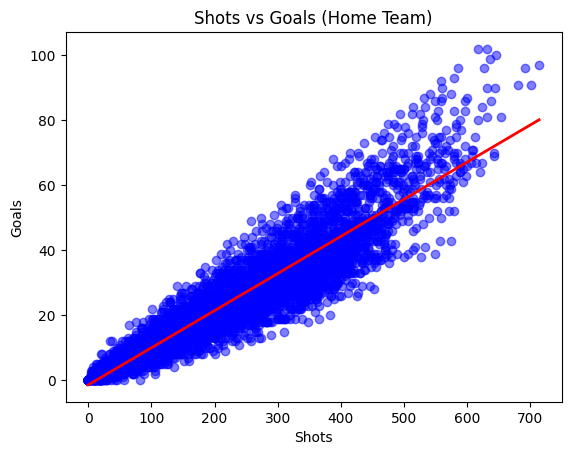

In [206]:
# criar o gráfico de dispersão
plt.scatter(df_subset['Shots_Home_Team'], df_subset['Goals_Home_Team'], c='blue', alpha=0.5)

# ajustar uma linha polinomial de ordem 1 (linha reta) aos dados
coefficients = np.polyfit(df_subset['Shots_Home_Team'], df_subset['Goals_Home_Team'], 1)
polynomial = np.poly1d(coefficients)

# criar pontos x para traçar a linha de tendência
x = np.linspace(df_subset['Shots_Home_Team'].min(), df_subset['Shots_Home_Team'].max(), 100)

# plotar a linha de tendência
plt.plot(x, polynomial(x), color='red', linewidth=2)

# adicionar título e rótulos dos eixos
plt.title('Shots vs Goals (Home Team)')
plt.xlabel('Shots')
plt.ylabel('Goals')

# exibir o gráfico
plt.show()


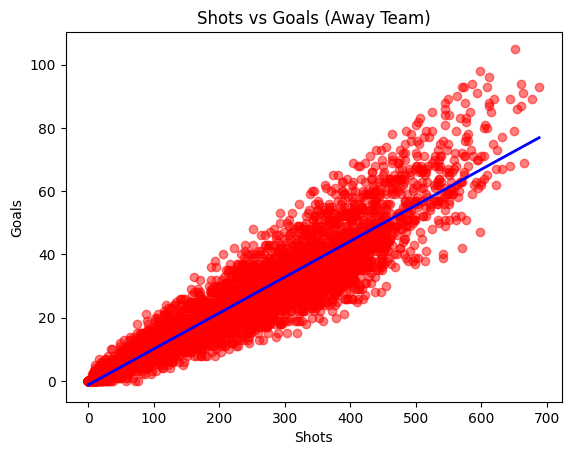

In [207]:
# criar o gráfico de dispersão
plt.scatter(df_subset['Shots_Away_Team'], df_subset['Goals_Away_Team'], c='red', alpha=0.5)

# ajustar uma linha polinomial de ordem 1 (linha reta) aos dados
coefficients = np.polyfit(df_subset['Shots_Away_Team'], df_subset['Goals_Away_Team'], 1)
polynomial = np.poly1d(coefficients)

# criar pontos x para traçar a linha de tendência
x = np.linspace(df_subset['Shots_Away_Team'].min(), df_subset['Shots_Away_Team'].max(), 100)

# plotar a linha de tendência
plt.plot(x, polynomial(x), color='blue', linewidth=2)

# adicionar título e rótulos dos eixos
plt.title('Shots vs Goals (Away Team)')
plt.xlabel('Shots')
plt.ylabel('Goals')

# exibir o gráfico
plt.show()

In [208]:
# cria uma lista para as entradas (X)
X = data[['HomeTeam_id', 'AwayTeam_id', 'Wins_Home_Team', 'Wins_Away_Team', 'Loss_Home_Team', 'Loss_Away_Team',
          'Draw_Home_Team', 'Draw_Away_Team', 'Goals_Home_Team', 'Goals_Away_Team', 'Shots_Home_Team', 'Shots_Away_Team',
          'Conceded_Goals_Home_Team', 'Conceded_Goals_Away_Team', 'Matches_Home_Team', 'Matches_Away_Team', 'HomePromoted', 'AwayPromoted']].values

# cria uma lista para as saídas (Y)
Y = data['FTR'].values

In [209]:
data.tail(1000)

,Game_id,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,Conceded_Goals_Away_Team,Shots_Home_Team,Shots_Away_Team,Matches_Home_Team,Matches_Away_Team,Round,avg_goals_home_team,avg_goals_away_team,avg_conceded_home_team,avg_conceded_away_team
3550,3551,E0,2020-12-19,Newcastle,Fulham,1.0,1.0,1,12.0,11.0,...,22.0,108.0,151.0,12.0,13.0,2020/14,1.333333,0.923077,1.750000,1.692308
3551,3552,E0,2020-12-20,Brighton,Sheffield United,1.0,1.0,1,21.0,5.0,...,24.0,156.0,116.0,13.0,13.0,2020/14,1.153846,0.538462,1.615385,1.846154
3552,3553,E0,2020-12-20,Tottenham,Leicester,0.0,2.0,2,8.0,17.0,...,17.0,148.0,144.0,13.0,13.0,2020/14,1.923077,1.846154,0.923077,1.307692
3553,3554,E0,2020-12-20,Man United,Leeds,6.0,2.0,0,26.0,17.0,...,24.0,160.0,199.0,12.0,13.0,2020/14,1.833333,1.692308,1.583333,1.846154
3554,3555,E0,2020-12-20,West Brom,Aston Villa,0.0,3.0,2,1.0,19.0,...,13.0,122.0,175.0,13.0,11.0,2020/14,0.769231,1.909091,2.000000,1.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4545,4546,E0,2023-05-21,Brighton,Southampton,3.0,1.0,0,26.0,5.0,...,66.0,558.0,397.0,35.0,36.0,2022/37,1.914286,0.861111,1.400000,1.833333
4546,4547,E0,2023-05-21,Man City,Chelsea,1.0,0.0,0,15.0,13.0,...,41.0,558.0,435.0,35.0,35.0,2022/37,2.628571,1.028571,0.885714,1.171429
4547,4548,E0,2023-05-22,Newcastle,Leicester,0.0,0.0,1,23.0,1.0,...,67.0,535.0,403.0,36.0,36.0,2022/37,1.861111,1.361111,0.888889,1.861111
4548,4549,E0,2023-05-24,Brighton,Man City,1.0,1.0,1,20.0,13.0,...,31.0,584.0,573.0,36.0,36.0,2022/37,1.944444,2.583333,1.388889,0.861111


Separar o Game_id para futura comparação e divide os dados em conjuntos de treinamento e teste

In [210]:
Game_id = data[['Game_id', 'HomeTeam', 'AwayTeam', 'Round']]

from sklearn.model_selection import train_test_split

game_id_train, game_id_test = train_test_split(Game_id, test_size=0.12, shuffle=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.12, shuffle=False)

# Normalização

In [211]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Normalizar os dados
scaler = MinMaxScaler()

X_train_scaler = scaler.fit_transform(X_train)

X_test_scaler = scaler.transform(X_test)

# Contruindo Rede

In [212]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(X_train_scaler, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=42)

In [213]:
print("Número total de camadas:", mlp.n_layers_)
print("Número de neurônios na camada de entrada:", X_train_scaler.shape[1])
print("Número de neurônios em cada camada oculta:", list(mlp.hidden_layer_sizes)[0])
print("Número de neurônios na camada de saída:", mlp.n_outputs_)

Número total de camadas: 3
Número de neurônios na camada de entrada: 18
Número de neurônios em cada camada oculta: 100
Número de neurônios na camada de saída: 3


In [214]:
# Obter as previsões no conjunto de teste
Y_pred = mlp.predict(X_test_scaler)

# Converter as previsões e os resultados reais em uma única dimensão
Y_test_flat = Y_test.flatten()
Y_pred_flat = Y_pred.flatten()

In [215]:
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score

lr_acc = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average = 'micro')

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))
print('Train score: {:.2f}%'.format(mlp.score(X_train_scaler, Y_train)*100))

Regressão Logística

Acurácia: 54.03%
F1 Score: 54.03%
Train score: 53.62%


In [216]:
# Criar um DataFrame com as informações
df = pd.DataFrame({'Round': game_id_test['Round'], 'Game_id': game_id_test['Game_id'], 'HomeTeam': game_id_test['HomeTeam'], 'AwayTeam': game_id_test['AwayTeam'], 'Real': Y_test_flat, 'Predicted': Y_pred_flat})

df.tail(1000)

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted
4004,2021/21,4005,Watford,Norwich,2,0
4005,2021/21,4006,Everton,Aston Villa,2,0
4006,2021/21,4007,Brentford,Wolves,2,0
4007,2021/21,4008,Leeds,Newcastle,2,0
4008,2021/21,4009,Man United,West Ham,0,0
...,...,...,...,...,...,...
4545,2022/37,4546,Brighton,Southampton,0,0
4546,2022/37,4547,Man City,Chelsea,0,0
4547,2022/37,4548,Newcastle,Leicester,1,0
4548,2022/37,4549,Brighton,Man City,1,2


In [217]:
# Criar um DataFrame com as informações
df_odds = pd.DataFrame({'Game_id': data['Game_id'], 'B365H': data['B365H'], 'B365D': data['B365D'], 'B365A': data['B365A']})

# Mesclar os DataFrames usando o Game_id como identificador
df_profit = pd.merge(df, df_odds, on='Game_id', how='left')

df_profit

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted,B365H,B365D,B365A
0,2021/21,4005,Watford,Norwich,2,0,2.00,3.50,3.75
1,2021/21,4006,Everton,Aston Villa,2,0,2.75,3.25,2.62
2,2021/21,4007,Brentford,Wolves,2,0,3.20,2.80,2.60
3,2021/21,4008,Leeds,Newcastle,2,0,2.00,3.50,3.75
4,2021/21,4009,Man United,West Ham,0,0,1.85,3.80,4.00
...,...,...,...,...,...,...,...,...,...
541,2022/37,4546,Brighton,Southampton,0,0,1.22,7.00,11.00
542,2022/37,4547,Man City,Chelsea,0,0,1.25,6.00,11.00
543,2022/37,4548,Newcastle,Leicester,1,0,1.36,5.50,7.00
544,2022/37,4549,Brighton,Man City,1,2,4.00,4.33,1.75


In [218]:
# Calcular os ganhos e perdas
df_profit['Ganhos_Perdas'] = df_profit.apply(lambda row: row['B365H'] if row['Real'] == 0 and row['Predicted'] == 0 else 
                                        (row['B365D'] if row['Real'] == 1 and row['Predicted'] == 1 else 
                                        (row['B365A'] if row['Real'] == 2 and row['Predicted'] == 2 else -1)), axis=1)
df_profit['Valor_Apostado'] = 1
df_profit['Retorno'] = df_profit['Ganhos_Perdas'] * df_profit['Valor_Apostado']

df_profit

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted,B365H,B365D,B365A,Ganhos_Perdas,Valor_Apostado,Retorno
0,2021/21,4005,Watford,Norwich,2,0,2.00,3.50,3.75,-1.00,1,-1.00
1,2021/21,4006,Everton,Aston Villa,2,0,2.75,3.25,2.62,-1.00,1,-1.00
2,2021/21,4007,Brentford,Wolves,2,0,3.20,2.80,2.60,-1.00,1,-1.00
3,2021/21,4008,Leeds,Newcastle,2,0,2.00,3.50,3.75,-1.00,1,-1.00
4,2021/21,4009,Man United,West Ham,0,0,1.85,3.80,4.00,1.85,1,1.85
...,...,...,...,...,...,...,...,...,...,...,...,...
541,2022/37,4546,Brighton,Southampton,0,0,1.22,7.00,11.00,1.22,1,1.22
542,2022/37,4547,Man City,Chelsea,0,0,1.25,6.00,11.00,1.25,1,1.25
543,2022/37,4548,Newcastle,Leicester,1,0,1.36,5.50,7.00,-1.00,1,-1.00
544,2022/37,4549,Brighton,Man City,1,2,4.00,4.33,1.75,-1.00,1,-1.00


In [219]:
# Somar a coluna "Retorno"
total_retorno = df_profit['Retorno'].sum()
total_apostado = df_profit['Valor_Apostado'].sum()

print('Total de Retorno:', total_retorno)
print('Total Apostado:', total_apostado)
print('Resultado Final:', total_retorno - total_apostado)

Total de Retorno: 290.63
Total Apostado: 546
Resultado Final: -255.37


In [220]:
# Adicionar coluna 'Match'
df['Match'] = df['Real'] == df['Predicted']

# Calcular porcentagem de acertos
accuracy = df['Match'].mean() * 100

print(f"A porcentagem de acertos é de {accuracy:.2f}%.")


A porcentagem de acertos é de 54.03%.


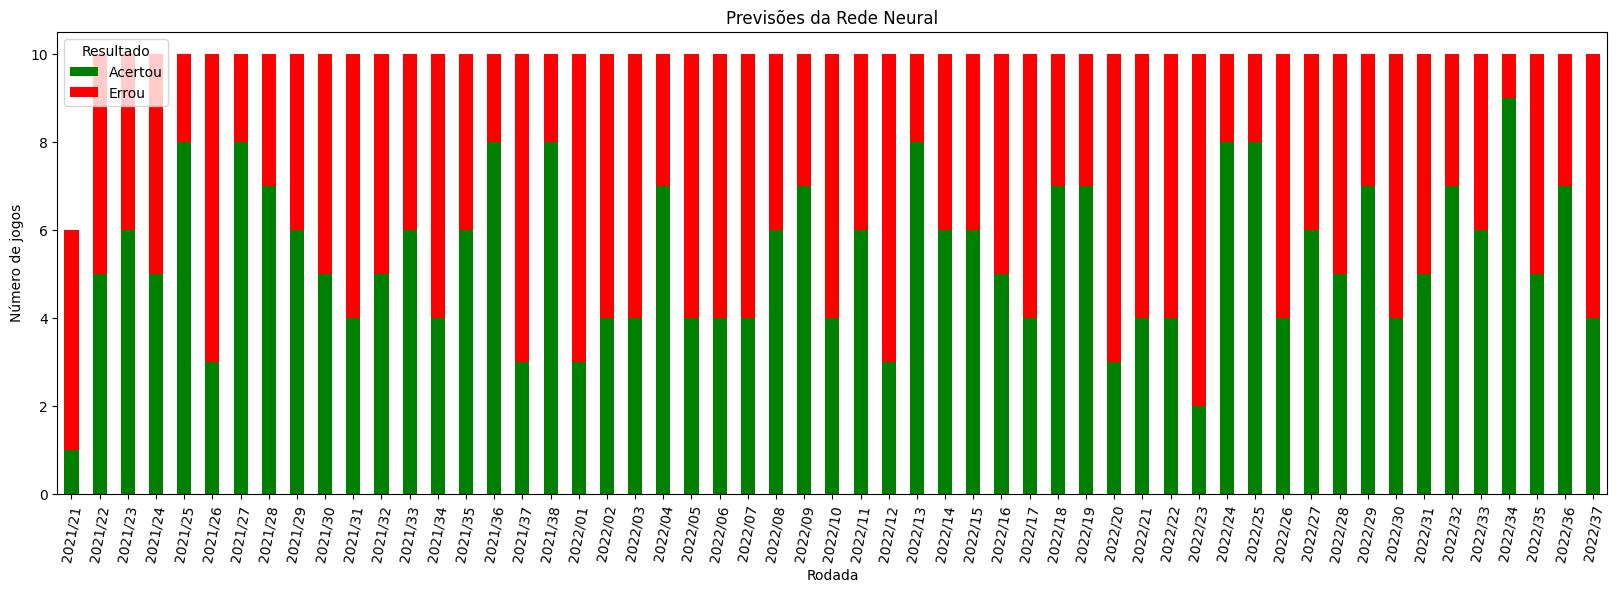

In [221]:
# cria a coluna "Resultado"
df['Resultado'] = df.apply(lambda x: 'Acertou' if x['Real'] == x['Predicted'] else 'Errou', axis=1)

# agrupa os dados por rodada e conta o número de acertos e erros
resultados_por_rodada = df.groupby('Round')['Resultado'].value_counts().unstack(fill_value=0)

# cria o gráfico de barras
fig, ax = plt.subplots(figsize=(20, 6))

resultados_por_rodada.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

ax.set_xlabel('Rodada')
ax.set_ylabel('Número de jogos')
ax.set_title('Previsões da Rede Neural')
ax.set_xticklabels(resultados_por_rodada.index, rotation=80)

plt.show()

# Alterando modelo para verificar se time da casa ganha ou perde apenas com jogos da Premier League

O intuito desta previsão é para descobrir se a equipe de casa ganha. Para isso foi considerado o empate como uma derrota ( igual a 1 ). Esse estudo é focado para a aposta "empate anula aposta", no qual caso o jogo de empate, a aposta é anulada e o jogador não perde dinheiro.

In [222]:
new_predict_data_e0 = data.copy()

# Mapear valores FTR para 0=0, 1=1, 2=1
new_htr_map = { 0: 0, 1: 1, 2: 1}
new_predict_data_e0['FTR'] = new_predict_data_e0['FTR'].map(new_htr_map)

new_predict_data_e0["FTR"] = new_predict_data_e0["FTR"].astype(int)

In [223]:
# cria uma lista para as entradas (X)
new_X_e0 = new_predict_data_e0[['HomeTeam_id', 'AwayTeam_id', 'Wins_Home_Team', 'Wins_Away_Team', 'Loss_Home_Team', 'Loss_Away_Team',
          'Draw_Home_Team', 'Draw_Away_Team', 'Goals_Home_Team', 'Goals_Away_Team', 'Shots_Home_Team', 'Shots_Away_Team',
          'Conceded_Goals_Home_Team', 'Conceded_Goals_Away_Team', 'Matches_Home_Team', 'Matches_Away_Team', 'HomePromoted', 'AwayPromoted']].values

# cria uma lista para as saídas (Y)
new_Y_e0 = new_predict_data_e0['FTR'].values

In [224]:
Game_id_e0 = new_predict_data_e0[['Game_id', 'HomeTeam', 'AwayTeam', 'Round']]

from sklearn.model_selection import train_test_split

new_game_id_train_e0, new_game_id_test_e0 = train_test_split(Game_id_e0, test_size=0.12, shuffle=False)

new_X_train_e0, new_X_test_e0, new_Y_train_e0, new_Y_test_e0 = train_test_split(new_X_e0, new_Y_e0, test_size=0.12, shuffle=False)

In [225]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# Normalizar os dados
scaler = MinMaxScaler()

new_X_train_scaler_e0 = scaler.fit_transform(new_X_train_e0)

new_X_test_scaler_e0 = scaler.transform(new_X_test_e0)

In [226]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

mlp.fit(new_X_train_scaler_e0, new_Y_train_e0)

MLPClassifier(random_state=42)

In [227]:
# Obter as previsões no conjunto de teste
new_Y_pred_e0 = mlp.predict(new_X_test_scaler_e0)

# Converter as previsões e os resultados reais em uma única dimensão
new_Y_test_flat_e0 = new_Y_test_e0.flatten()
new_Y_pred_flat_e0 = new_Y_pred_e0.flatten()

In [228]:
from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score

lr_acc = accuracy_score(new_Y_test_e0, new_Y_pred_e0)
f1 = f1_score(new_Y_test_e0, new_Y_pred_e0, average = 'micro')

print('Regressão Logística')
print('')
print('Acurácia: {:.2f}%'.format(lr_acc*100))
print('F1 Score: {:.2f}%'.format(f1*100))
print('Train score: {:.2f}%'.format(mlp.score(new_X_test_scaler_e0, new_Y_test_e0)*100))

Regressão Logística

Acurácia: 64.47%
F1 Score: 64.47%
Train score: 64.47%


In [229]:
# Criar um DataFrame com as informações
df = pd.DataFrame({'Round': new_game_id_test_e0['Round'], 'Game_id': new_game_id_test_e0['Game_id'], 'HomeTeam': new_game_id_test_e0['HomeTeam'], 'AwayTeam': new_game_id_test_e0['AwayTeam'], 'Real': new_Y_test_flat_e0, 'Predicted': new_Y_pred_flat_e0})

df.tail(1000)

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted
4004,2021/21,4005,Watford,Norwich,1,0
4005,2021/21,4006,Everton,Aston Villa,1,1
4006,2021/21,4007,Brentford,Wolves,1,1
4007,2021/21,4008,Leeds,Newcastle,1,0
4008,2021/21,4009,Man United,West Ham,0,1
...,...,...,...,...,...,...
4545,2022/37,4546,Brighton,Southampton,0,0
4546,2022/37,4547,Man City,Chelsea,0,0
4547,2022/37,4548,Newcastle,Leicester,1,0
4548,2022/37,4549,Brighton,Man City,1,1


In [230]:
# Criar um DataFrame com as informações
df_odds = pd.DataFrame({'Game_id': data['Game_id'], 'B365AHH': data['B365AHH'], 'B365AHA': data['B365AHA']})

# Mesclar os DataFrames usando o Game_id como identificador
df_profit = pd.merge(df, df_odds, on='Game_id', how='left')

df_profit

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted,B365AHH,B365AHA
0,2021/21,4005,Watford,Norwich,1,0,2.08,1.85
1,2021/21,4006,Everton,Aston Villa,1,1,2.02,1.91
2,2021/21,4007,Brentford,Wolves,1,1,2.16,1.78
3,2021/21,4008,Leeds,Newcastle,1,0,2.02,1.91
4,2021/21,4009,Man United,West Ham,0,1,1.93,2.00
...,...,...,...,...,...,...,...,...
541,2022/37,4546,Brighton,Southampton,0,0,2.05,1.85
542,2022/37,4547,Man City,Chelsea,0,0,1.94,1.96
543,2022/37,4548,Newcastle,Leicester,1,0,2.03,1.87
544,2022/37,4549,Brighton,Man City,1,1,1.87,2.06


In [231]:
# Calcular os ganhos e perdas
df_profit['Ganhos_Perdas'] = df_profit.apply(lambda row: row['B365AHH'] if row['Real'] == 0 and row['Predicted'] == 0 else 
                                        (row['B365AHA'] if row['Real'] == 1 and row['Predicted'] == 1 else -1), axis=1)
df_profit['Valor_Apostado'] = 1
df_profit['Retorno'] = df_profit['Ganhos_Perdas'] * df_profit['Valor_Apostado']

df_profit

,Round,Game_id,HomeTeam,AwayTeam,Real,Predicted,B365AHH,B365AHA,Ganhos_Perdas,Valor_Apostado,Retorno
0,2021/21,4005,Watford,Norwich,1,0,2.08,1.85,-1.00,1,-1.00
1,2021/21,4006,Everton,Aston Villa,1,1,2.02,1.91,1.91,1,1.91
2,2021/21,4007,Brentford,Wolves,1,1,2.16,1.78,1.78,1,1.78
3,2021/21,4008,Leeds,Newcastle,1,0,2.02,1.91,-1.00,1,-1.00
4,2021/21,4009,Man United,West Ham,0,1,1.93,2.00,-1.00,1,-1.00
...,...,...,...,...,...,...,...,...,...,...,...
541,2022/37,4546,Brighton,Southampton,0,0,2.05,1.85,2.05,1,2.05
542,2022/37,4547,Man City,Chelsea,0,0,1.94,1.96,1.94,1,1.94
543,2022/37,4548,Newcastle,Leicester,1,0,2.03,1.87,-1.00,1,-1.00
544,2022/37,4549,Brighton,Man City,1,1,1.87,2.06,2.06,1,2.06


In [232]:
# Somar a coluna "Retorno"
total_retorno = df_profit['Retorno'].sum()
total_apostado = df_profit['Valor_Apostado'].sum()

print('Total de Retorno:', total_retorno)
print('Total Apostado:', total_apostado)
print('Resultado Final:', total_retorno - total_apostado)

Total de Retorno: 490.98
Total Apostado: 546
Resultado Final: -55.01999999999998


In [233]:
# Adicionar coluna 'Match'
df['Match'] = df['Real'] == df['Predicted']

# Calcular porcentagem de acertos
accuracy = df['Match'].mean() * 100

print(f"A porcentagem de acertos é de {accuracy:.2f}%.")


A porcentagem de acertos é de 64.47%.


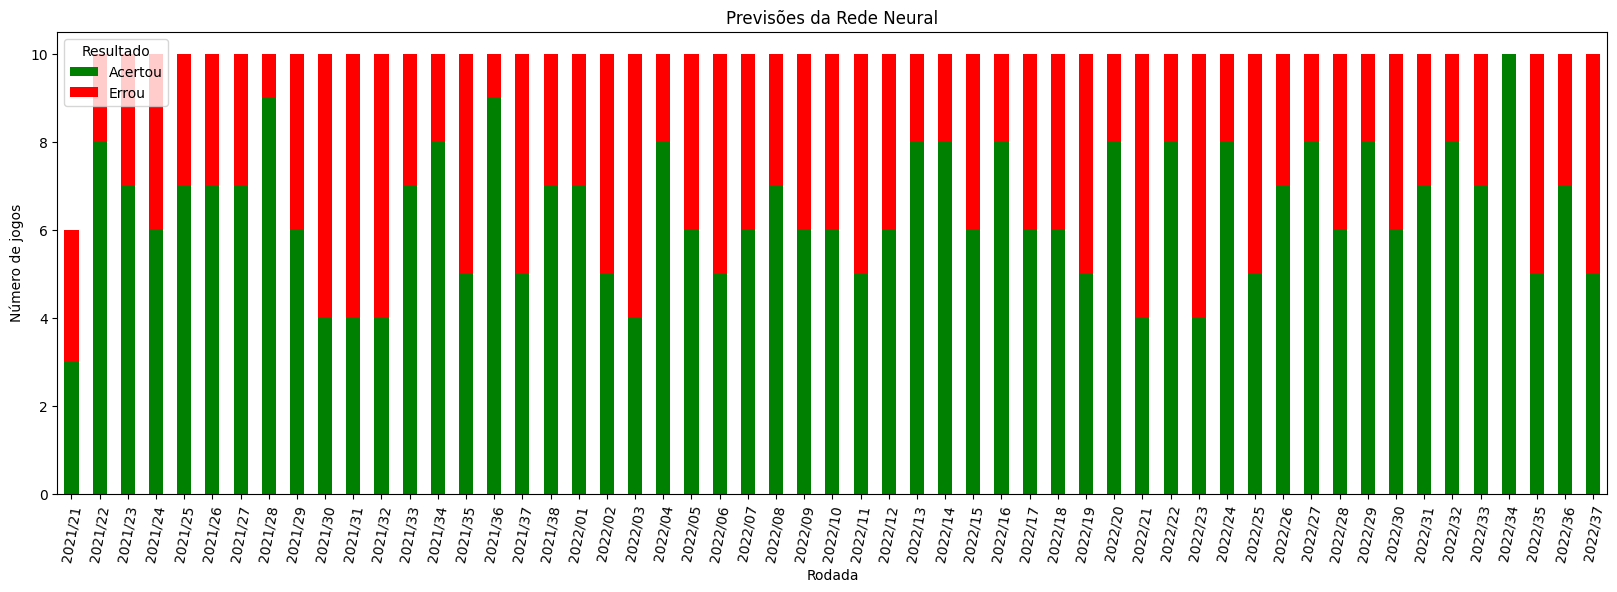

In [234]:
# cria a coluna "Resultado"
df['Resultado'] = df.apply(lambda x: 'Acertou' if x['Real'] == x['Predicted'] else 'Errou', axis=1)

# agrupa os dados por rodada e conta o número de acertos e erros
resultados_por_rodada = df.groupby('Round')['Resultado'].value_counts().unstack(fill_value=0)

# cria o gráfico de barras
fig, ax = plt.subplots(figsize=(20, 6))

resultados_por_rodada.plot(kind='bar', stacked=True, ax=ax, color=['green', 'red'])

ax.set_xlabel('Rodada')
ax.set_ylabel('Número de jogos')
ax.set_title('Previsões da Rede Neural')
ax.set_xticklabels(resultados_por_rodada.index, rotation=80)

plt.show()